In [1]:
import sys

sys.path.append('lib')
from calculation_manager import CalculationManager
from cross_section import CrossSection

xs_fuel = CrossSection()
xs_fuel.set([[1.58, 0.0032, 0.0, 1.0],[0.271, 0.0930, 0.168, 0.0]])
xs_fuel.set_smat( [[0.0, 0.0178], [0.0, 0.0]])
xs_fuel.calc_sigr()

xs_ref = CrossSection()
xs_ref.set([[1.41, 0.0, 0.0, 1.0],[0.117, 0.0191, 0.0, 0.0]])
xs_ref.set_smat( [[0.0, 0.0476], [0.0, 0.0]])
xs_ref.calc_sigr()

geom = [{'xs':xs_ref, 'width':30}, {'xs':xs_fuel, 'width':60}, {'xs':xs_ref, 'width':30} ]

delta = 1.0
albedo = -1.0

config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'max_iteration': 1000, \
            'omega': 0.5, 'asymptotic_criteria': 0.05}

calc_man = CalculationManager(config)
count, flag = calc_man.run()
print( "outer iterations:", count)

keff = calc_man.get_keff()


print ("count = ", count, ", keff = ", keff)

outer iterations: 65
count =  65 , keff =  1.3582632555729413


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

keffs = []
omegas = [-0.5, -0.25, -0.1, 0.0, 0.1, 0.25, 0.5, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for omega in omegas:
    config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'omega': omega, 'asymptotic_criteria':0.03}
    calc_man = CalculationManager(config)
    count, flag = calc_man.run()
    keff = calc_man.get_keff()
    print("omega = {:.1f}  count = {:3d}  flag = {}  keff = {:5f}".format(omega, count, flag, keff))
    keffs.append(keff)   

    

omega = -0.5  count =  66  flag = True  keff = 1.358263
omega = -0.2  count =  65  flag = True  keff = 1.358263
omega = -0.1  count =  65  flag = True  keff = 1.358263
omega = 0.0  count =  65  flag = True  keff = 1.358263
omega = 0.1  count =  65  flag = True  keff = 1.358263
omega = 0.2  count =  65  flag = True  keff = 1.358263
omega = 0.5  count =  65  flag = True  keff = 1.358263
omega = 1.0  count =  55  flag = True  keff = 1.358265
omega = 1.1  count =  75  flag = True  keff = 1.358263
omega = 1.2  count =  64  flag = True  keff = 1.358263
omega = 1.3  count = 130  flag = True  keff = 1.358263
omega = 1.4  count =  72  flag = True  keff = 1.358264
omega = 1.5  count =  73  flag = True  keff = 1.358264
omega = 2.0  count =  61  flag = True  keff = 1.358264


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

keffs = []
omegas = [x / 10 for x in list(range(21))]
criteria = [x / 1000 for x in range(1, 51)]
counts = np.zeros((len(omegas), len(criteria)))

min_count = 99999

for i in range(len(omegas)):
    for j in range(len(criteria)):
        omega = omegas[i]
        cri = criteria[j]
        config = { 'geometry':geom, 'mesh_width':delta, 'albedo': albedo, 'omega': omega, 'asymptotic_criteria':cri}
        calc_man = CalculationManager(config)
        count, flag = calc_man.run()
        keff = calc_man.get_keff()
        print("omega = {:.1f}  cri = {:.3f}  count = {:3d}  flag = {}  keff = {:5f}".format(omega, cri, count, flag, keff))
        if flag:
            counts[i][j] = count
            if count < min_count:
                min_count = count
                min_omega = omega
                min_cri   = cri
        keffs.append(keff)   


omega = 0.0  cri = 0.001  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.002  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.003  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.004  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.005  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.006  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.007  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.008  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.009  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.010  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.011  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.012  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.013  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.014  count =  65  flag = True  keff = 1.358263
omega = 0.0  cri = 0.015  count =  65  flag = Tr

omega = 0.2  cri = 0.022  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.023  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.024  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.025  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.026  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.027  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.028  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.029  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.030  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.031  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.032  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.033  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.034  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.035  count =  65  flag = True  keff = 1.358263
omega = 0.2  cri = 0.036  count =  65  flag = Tr

omega = 0.4  cri = 0.043  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.044  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.045  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.046  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.047  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.048  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.049  count =  65  flag = True  keff = 1.358263
omega = 0.4  cri = 0.050  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.001  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.002  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.003  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.004  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.005  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.006  count =  65  flag = True  keff = 1.358263
omega = 0.5  cri = 0.007  count =  65  flag = Tr

omega = 0.7  cri = 0.014  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.015  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.016  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.017  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.018  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.019  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.020  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.021  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.022  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.023  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.024  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.025  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.026  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.027  count =  64  flag = True  keff = 1.358263
omega = 0.7  cri = 0.028  count =  64  flag = Tr

omega = 0.9  cri = 0.035  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.036  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.037  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.038  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.039  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.040  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.041  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.042  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.043  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.044  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.045  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.046  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.047  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.048  count =  65  flag = True  keff = 1.358263
omega = 0.9  cri = 0.049  count =  65  flag = Tr

omega = 1.2  cri = 0.006  count =  67  flag = True  keff = 1.358263
omega = 1.2  cri = 0.007  count =  67  flag = True  keff = 1.358263
omega = 1.2  cri = 0.008  count =  67  flag = True  keff = 1.358263
omega = 1.2  cri = 0.009  count =  67  flag = True  keff = 1.358263
omega = 1.2  cri = 0.010  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.011  count =  68  flag = True  keff = 1.358263
omega = 1.2  cri = 0.012  count =  68  flag = True  keff = 1.358263
omega = 1.2  cri = 0.013  count =  68  flag = True  keff = 1.358263
omega = 1.2  cri = 0.014  count =  68  flag = True  keff = 1.358263
omega = 1.2  cri = 0.015  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.016  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.017  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.018  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.019  count =  66  flag = True  keff = 1.358263
omega = 1.2  cri = 0.020  count =  66  flag = Tr

omega = 1.4  cri = 0.027  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.028  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.029  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.030  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.031  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.032  count =  72  flag = True  keff = 1.358264
omega = 1.4  cri = 0.033  count =  71  flag = True  keff = 1.358264
omega = 1.4  cri = 0.034  count =  71  flag = True  keff = 1.358264
omega = 1.4  cri = 0.035  count =  69  flag = True  keff = 1.358264
omega = 1.4  cri = 0.036  count =  69  flag = True  keff = 1.358264
omega = 1.4  cri = 0.037  count =  69  flag = True  keff = 1.358264
omega = 1.4  cri = 0.038  count =  69  flag = True  keff = 1.358264
omega = 1.4  cri = 0.039  count =  69  flag = True  keff = 1.358264
omega = 1.4  cri = 0.040  count =  62  flag = True  keff = 1.358263
omega = 1.4  cri = 0.041  count =  62  flag = Tr

omega = 1.6  cri = 0.048  count = 107  flag = True  keff = 1.358264
omega = 1.6  cri = 0.049  count = 107  flag = True  keff = 1.358264
omega = 1.6  cri = 0.050  count = 107  flag = True  keff = 1.358264
omega = 1.7  cri = 0.001  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.002  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.003  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.004  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.005  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.006  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.007  count =  78  flag = True  keff = 1.358264
omega = 1.7  cri = 0.008  count = 112  flag = True  keff = 1.358264
omega = 1.7  cri = 0.009  count = 112  flag = True  keff = 1.358264
omega = 1.7  cri = 0.010  count = 112  flag = True  keff = 1.358264
omega = 1.7  cri = 0.011  count =  96  flag = True  keff = 1.358263
omega = 1.7  cri = 0.012  count =  96  flag = Tr

omega = 1.9  cri = 0.019  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.020  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.021  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.022  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.023  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.024  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.025  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.026  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.027  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.028  count =  86  flag = True  keff = 1.358264
omega = 1.9  cri = 0.029  count =  85  flag = True  keff = 1.358264
omega = 1.9  cri = 0.030  count =  85  flag = True  keff = 1.358264
omega = 1.9  cri = 0.031  count =  85  flag = True  keff = 1.358264
omega = 1.9  cri = 0.032  count = 187  flag = True  keff = 1.358263
omega = 1.9  cri = 0.033  count =  98  flag = Tr

In [6]:
min_count, min_omega, min_cri

(55, 1.0, 0.029)

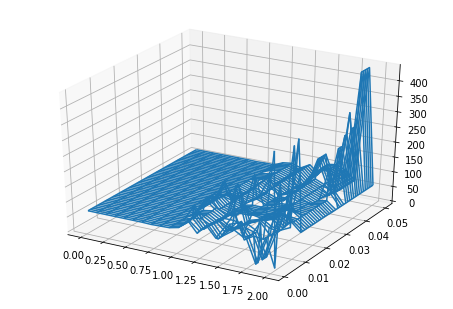

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X, Y = np.meshgrid(criteria, omegas)
Z = np.array(counts)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(Y,X,Z) 

plt.show()
